**********************************************************************
 INTRODUCTION TO SATELLITE ENGINEERING - ADCS ASSIGNMENT
 6U CubeSat Attitude Control System Design
**********************************************************************
PROBLEM 1: Moment of Inertia Matrix
CubeSat dimensions: 0.1 m × 0.2 m × 0.34 m
Mass: 8.0 kg
Assumption: Uniform density, COM at geometric center

Inertia Matrix J (kg·m²):
[[0.10373333 0.         0.        ]
 [0.         0.08373333 0.        ]
 [0.         0.         0.03333333]]

J_xx = 0.103733 kg·m²
J_yy = 0.083733 kg·m²
J_zz = 0.033333 kg·m²

Explanation of Zero Off-Diagonal Terms:
----------------------------------------------------------------------
For a rectangular prism with:
1. Uniform mass distribution
2. Body frame axes aligned with the geometric edges
3. Center of mass at the geometric center

The body frame axes are PRINCIPAL AXES, meaning:
- The products of inertia (J_xy, J_xz, J_yz) are zero
- This is due to symmetry about each prin

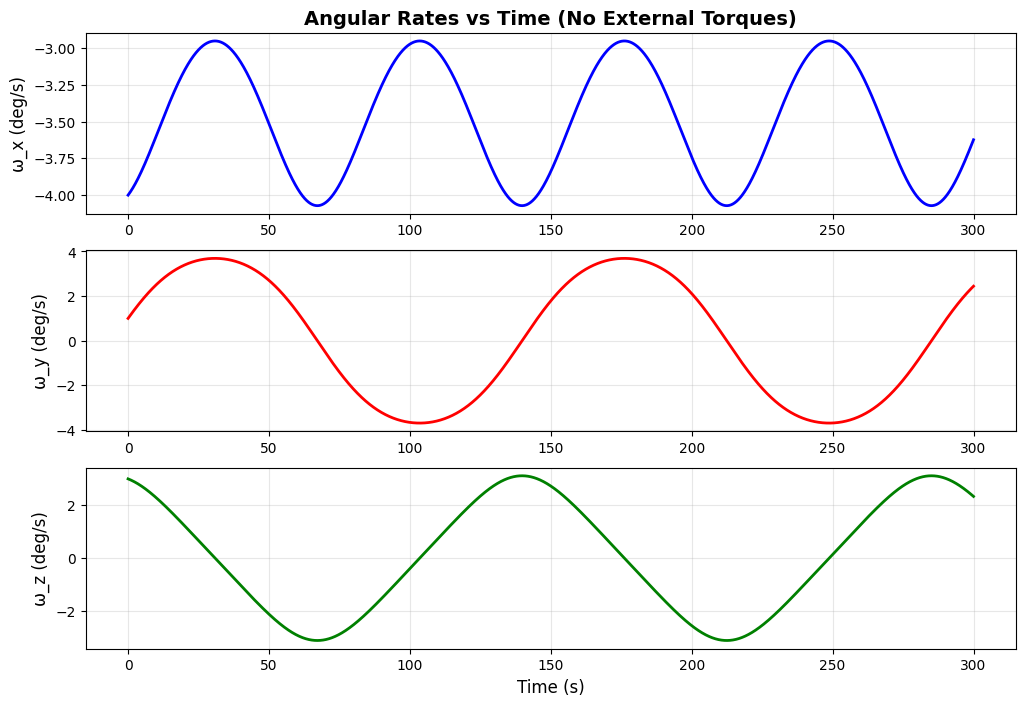

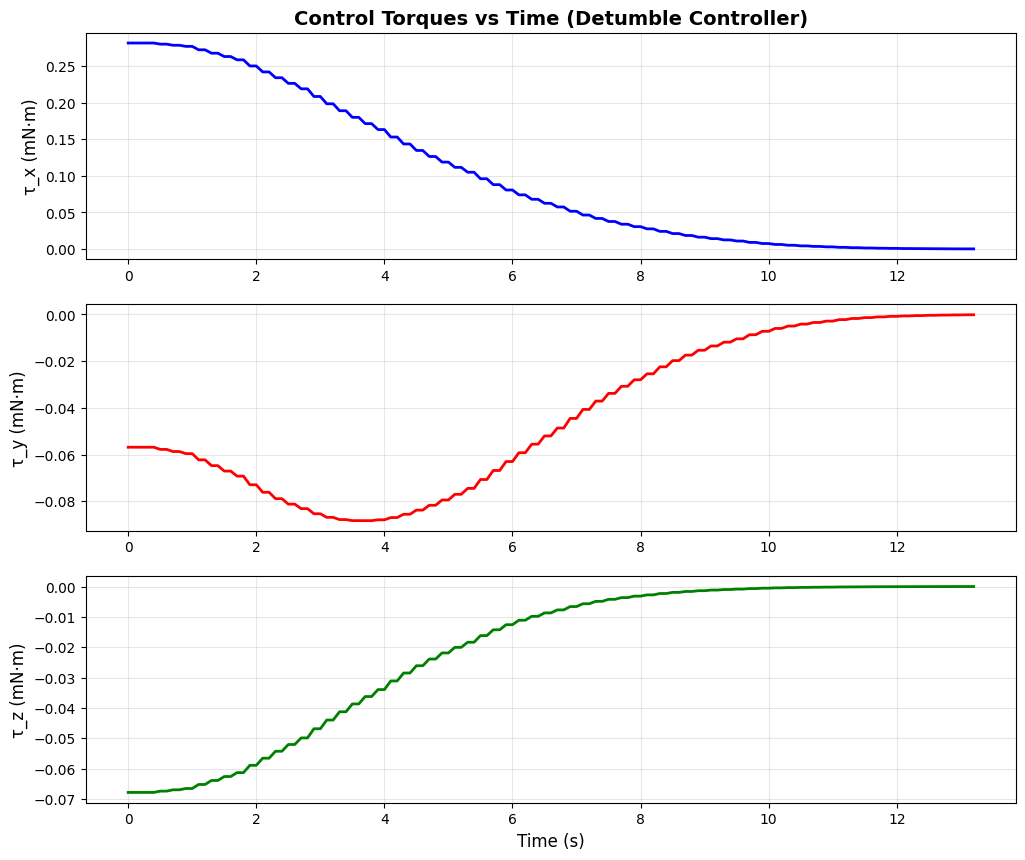

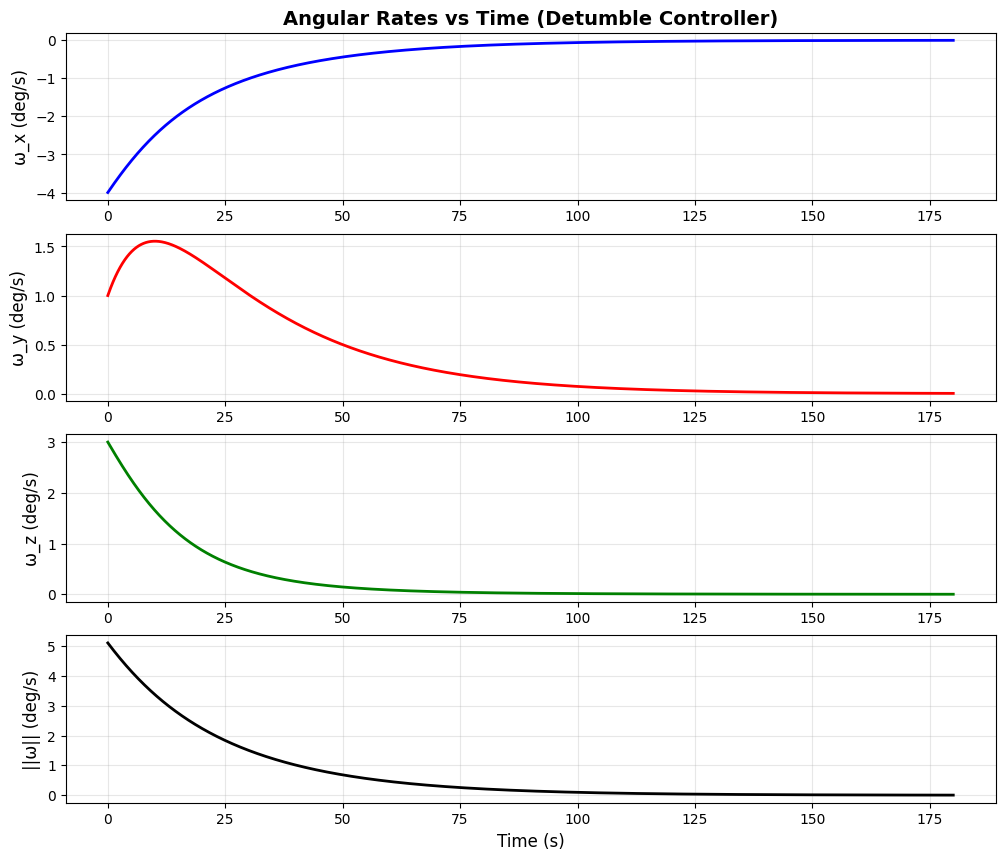

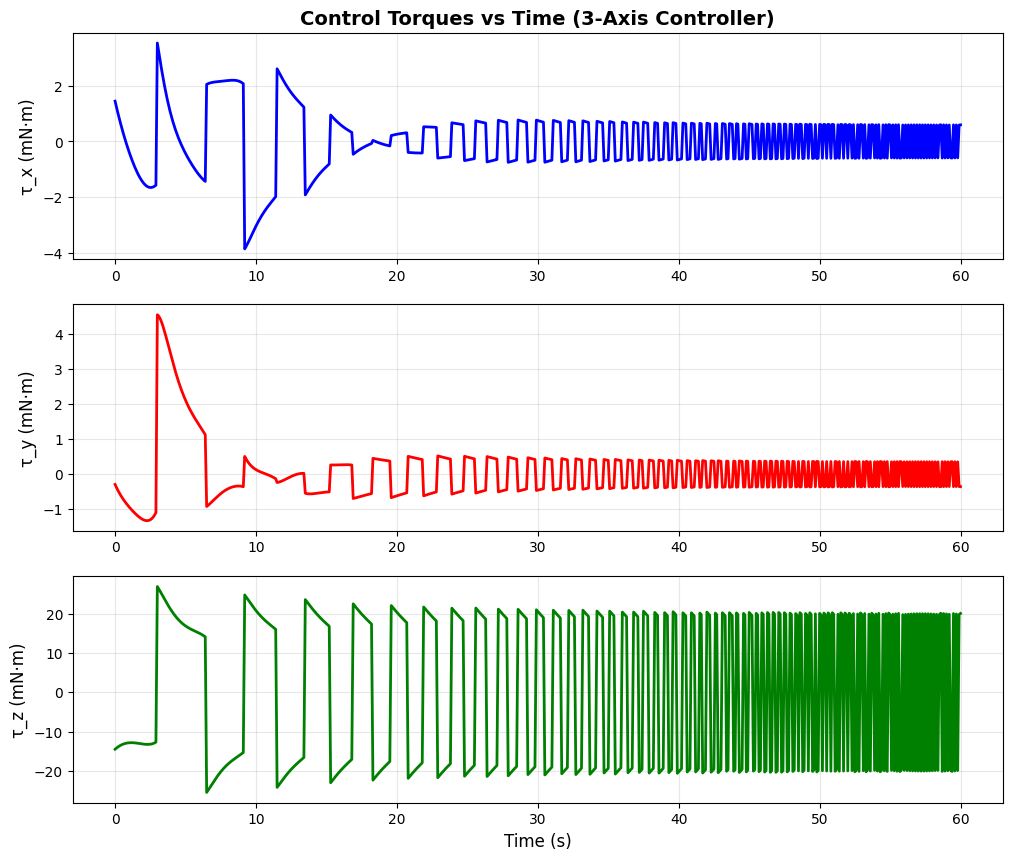

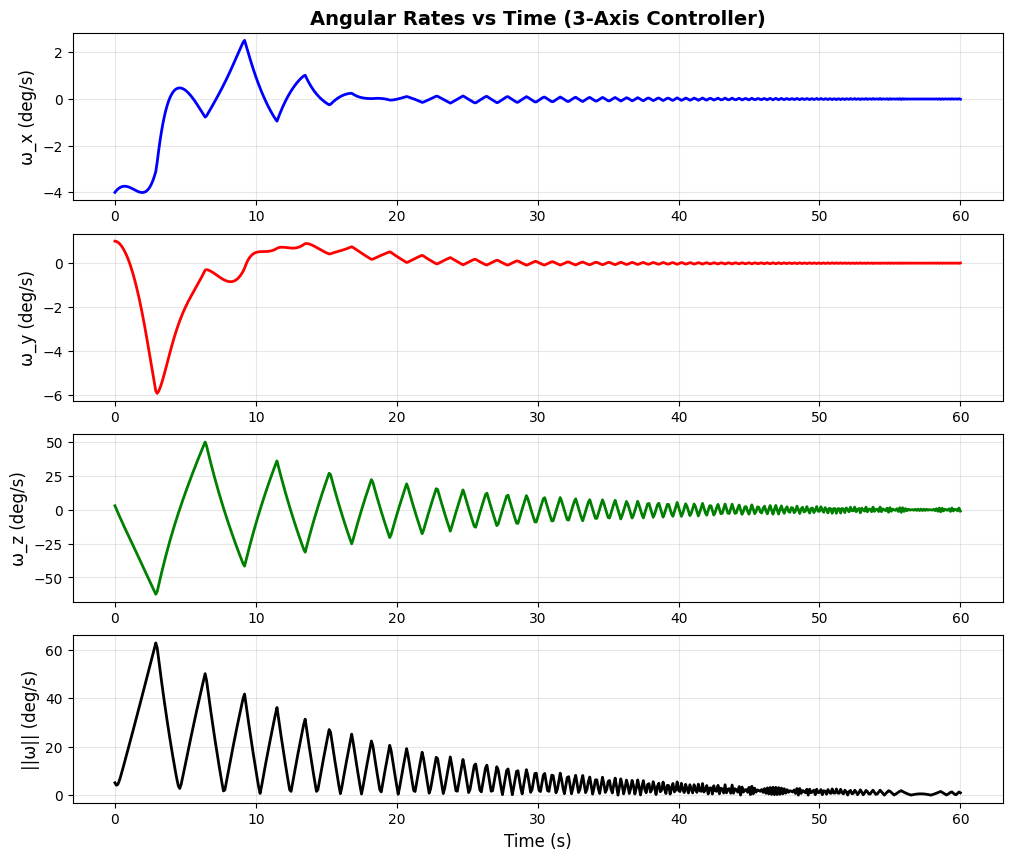

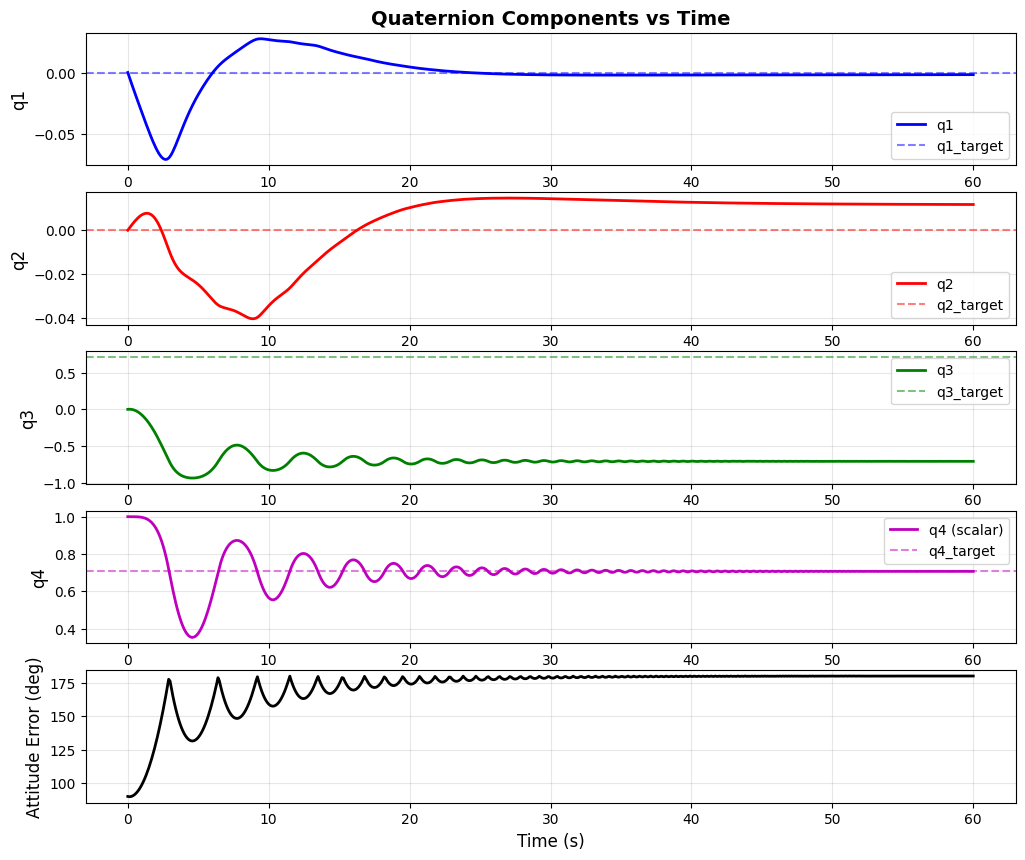

In [1]:
"""
ADCS Assignment Solutions
Student: Akramov Abboskhuja

6U CubeSat Parameters:
- Dimensions: 10 cm × 20 cm × 34 cm
- Mass: 8 kg
- Center of mass at geometric center
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ============================================================================
# PROBLEM 1: Calculate Moment of Inertia Matrix J_3x3
# ============================================================================

def problem1_inertia_matrix():
    """
    Calculate the moment of inertia matrix for a 6U CubeSat.
    Dimensions: 10 cm × 20 cm × 34 cm
    Mass: 8 kg
    Assume uniform density and geometric center as COM
    """
    print("=" * 70)
    print("PROBLEM 1: Moment of Inertia Matrix")
    print("=" * 70)
    
    # CubeSat dimensions in meters
    a = 0.10  # x-dimension (m)
    b = 0.20  # y-dimension (m)
    c = 0.34  # z-dimension (m)
    m = 8.0   # mass (kg)
    
    print(f"CubeSat dimensions: {a} m × {b} m × {c} m")
    print(f"Mass: {m} kg")
    print(f"Assumption: Uniform density, COM at geometric center\n")
    
    # For a rectangular prism with uniform density, the inertia tensor is:
    # J_xx = (1/12) * m * (b² + c²)
    # J_yy = (1/12) * m * (a² + c²)
    # J_zz = (1/12) * m * (a² + b²)
    # J_xy = J_xz = J_yz = 0 (due to symmetry about principal axes)
    
    J_xx = (1/12) * m * (b**2 + c**2)
    J_yy = (1/12) * m * (a**2 + c**2)
    J_zz = (1/12) * m * (a**2 + b**2)
    
    # Construct the inertia matrix
    J = np.array([
        [J_xx, 0,    0   ],
        [0,    J_yy, 0   ],
        [0,    0,    J_zz]
    ])
    
    print("Inertia Matrix J (kg·m²):")
    print(J)
    print(f"\nJ_xx = {J_xx:.6f} kg·m²")
    print(f"J_yy = {J_yy:.6f} kg·m²")
    print(f"J_zz = {J_zz:.6f} kg·m²")
    
    print("\nExplanation of Zero Off-Diagonal Terms:")
    print("-" * 70)
    print("For a rectangular prism with:")
    print("1. Uniform mass distribution")
    print("2. Body frame axes aligned with the geometric edges")
    print("3. Center of mass at the geometric center")
    print("\nThe body frame axes are PRINCIPAL AXES, meaning:")
    print("- The products of inertia (J_xy, J_xz, J_yz) are zero")
    print("- This is due to symmetry about each principal plane")
    print("- Each plane (xy, xz, yz) is a plane of symmetry")
    print("\nMathematically, for a symmetric body:")
    print("J_xy = ∫∫∫ ρ·x·y dV = 0 (symmetry in xy-plane)")
    print("J_xz = ∫∫∫ ρ·x·z dV = 0 (symmetry in xz-plane)")
    print("J_yz = ∫∫∫ ρ·y·z dV = 0 (symmetry in yz-plane)")
    
    return J


# ============================================================================
# PROBLEM 2: Calculate Initial Angular Momentum
# ============================================================================

def problem2_angular_momentum(J):
    """
    Calculate initial angular momentum given initial angular rate.
    Ω_B,i = [-4, 1, 3] deg/s
    """
    print("\n" + "=" * 70)
    print("PROBLEM 2: Initial Angular Momentum")
    print("=" * 70)
    
    # Initial angular rate in deg/s
    omega_deg = np.array([-4.0, 1.0, 3.0])
    
    # Convert to rad/s
    omega_rad = omega_deg * np.pi / 180.0
    
    print(f"Initial angular rate Ω_B,i = {omega_deg} deg/s")
    print(f"                           = {omega_rad} rad/s")
    
    # Calculate angular momentum: H = J · Ω
    H = J @ omega_rad
    
    print(f"\nAngular momentum H = J · Ω")
    print(f"H_x = {H[0]:.6e} kg·m²/s")
    print(f"H_y = {H[1]:.6e} kg·m²/s")
    print(f"H_z = {H[2]:.6e} kg·m²/s")
    
    # Magnitude of angular momentum
    H_magnitude = np.linalg.norm(H)
    print(f"\nMagnitude ||H|| = {H_magnitude:.6e} kg·m²/s")
    
    return omega_rad, H


# ============================================================================
# PROBLEM 3: Simulate Angular Dynamics without Torques
# ============================================================================

def dynamics_no_torque(state, t, J):
    """
    Dynamics model: J·Ω̇ + Ω × (J·Ω) = τ
    For τ = 0: Ω̇ = -J^(-1) · (Ω × (J·Ω))
    
    state = [ωx, ωy, ωz] in rad/s
    """
    omega = state
    
    # Calculate J·Ω
    J_omega = J @ omega
    
    # Calculate Ω × (J·Ω)
    omega_cross_J_omega = np.cross(omega, J_omega)
    
    # Calculate Ω̇ = -J^(-1) · (Ω × (J·Ω))
    J_inv = np.linalg.inv(J)
    omega_dot = -J_inv @ omega_cross_J_omega
    
    return omega_dot


def problem3_simulate_no_torque(J, omega_initial):
    """
    Simulate angular dynamics without torques for 5 minutes using RK4.
    """
    print("\n" + "=" * 70)
    print("PROBLEM 3: Simulate Angular Dynamics (No Torques)")
    print("=" * 70)
    
    # Simulation time: 5 minutes = 300 seconds
    t_end = 300.0
    dt = 0.1  # time step in seconds
    time = np.arange(0, t_end + dt, dt)
    
    print(f"Simulation duration: {t_end} seconds ({t_end/60} minutes)")
    print(f"Time step: {dt} seconds")
    print(f"Integration method: 4th-order Runge-Kutta (RK4 via odeint)")
    
    # Initial state
    initial_state = omega_initial
    
    # Integrate using odeint (which uses LSODA, includes RK4-like methods)
    solution = odeint(dynamics_no_torque, initial_state, time, args=(J,))
    
    # Extract angular rates
    omega_x = solution[:, 0]
    omega_y = solution[:, 1]
    omega_z = solution[:, 2]
    
    # Convert to deg/s for plotting
    omega_x_deg = omega_x * 180.0 / np.pi
    omega_y_deg = omega_y * 180.0 / np.pi
    omega_z_deg = omega_z * 180.0 / np.pi
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(time, omega_x_deg, 'b-', linewidth=2)
    plt.ylabel('ω_x (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.title('Angular Rates vs Time (No External Torques)', fontsize=14, fontweight='bold')
    
    plt.subplot(3, 1, 2)
    plt.plot(time, omega_y_deg, 'r-', linewidth=2)
    plt.ylabel('ω_y (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 1, 3)
    plt.plot(time, omega_z_deg, 'g-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('ω_z (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Check angular momentum conservation
    H_initial = J @ omega_initial
    H_final = J @ solution[-1, :]
    H_initial_mag = np.linalg.norm(H_initial)
    H_final_mag = np.linalg.norm(H_final)
    
    print(f"\nAngular momentum conservation check:")
    print(f"||H_initial|| = {H_initial_mag:.6e} kg·m²/s")
    print(f"||H_final||   = {H_final_mag:.6e} kg·m²/s")
    print(f"Difference:     {abs(H_final_mag - H_initial_mag):.6e} kg·m²/s")
    print(f"Relative error: {abs(H_final_mag - H_initial_mag)/H_initial_mag * 100:.6e} %")
    
    return time, solution


# ============================================================================
# PROBLEM 4: Design Detumble Controller
# ============================================================================

def dynamics_with_torque(state, t, J, controller_func):
    """
    Dynamics model with control torque: J·Ω̇ + Ω × (J·Ω) = τ_c
    Ω̇ = J^(-1) · [τ_c - Ω × (J·Ω)]
    
    state = [ωx, ωy, ωz] in rad/s
    controller_func: function that returns control torque given (omega, t)
    """
    omega = state
    
    # Get control torque
    tau_c = controller_func(omega, t)
    
    # Calculate J·Ω
    J_omega = J @ omega
    
    # Calculate Ω × (J·Ω)
    omega_cross_J_omega = np.cross(omega, J_omega)
    
    # Calculate Ω̇ = J^(-1) · [τ_c - Ω × (J·Ω)]
    J_inv = np.linalg.inv(J)
    omega_dot = J_inv @ (tau_c - omega_cross_J_omega)
    
    return omega_dot


def problem4_detumble_controller(J, omega_initial):
    """
    Design a detumble controller to reduce ||Ω_B|| to 0 in exactly 3 minutes.
    Controller: τ_c = -K_d · Ω_B
    """
    print("\n" + "=" * 70)
    print("PROBLEM 4: Detumble Controller Design")
    print("=" * 70)
    
    # Target: reduce angular rate to 0 in 3 minutes = 180 seconds
    t_end = 180.0
    dt = 0.1
    time = np.arange(0, t_end + dt, dt)
    
    # Initial angular rate magnitude
    omega_initial_mag = np.linalg.norm(omega_initial)
    omega_initial_deg_mag = omega_initial_mag * 180.0 / np.pi
    
    print(f"Initial angular rate magnitude: {omega_initial_deg_mag:.4f} deg/s")
    print(f"Target: reduce to 0 deg/s in {t_end} seconds")

    
    # Simple approach: K_d = λ * J (proportional to inertia)
    lambda_decay = 7.0 / t_end  # slightly faster decay to ensure we reach near-zero
    K_d = lambda_decay * J
    
    print(f"\nGain matrix K_d (Nm·s):")
    print(K_d)
    
    # Storage for torques
    torques = []
    
    def detumble_controller(omega, t):
        """Detumble control law: τ_c = -K_d · Ω"""
        tau_c = -K_d @ omega
        torques.append(tau_c.copy())
        return tau_c
    
    # Integrate
    solution = odeint(dynamics_with_torque, omega_initial, time, args=(J, detumble_controller))
    
    # Convert torques to array
    torques = np.array(torques)
    
    # Extract angular rates
    omega_x = solution[:, 0]
    omega_y = solution[:, 1]
    omega_z = solution[:, 2]
    
    # Convert to deg/s
    omega_x_deg = omega_x * 180.0 / np.pi
    omega_y_deg = omega_y * 180.0 / np.pi
    omega_z_deg = omega_z * 180.0 / np.pi
    
    # Calculate magnitude of angular rate
    omega_mag = np.sqrt(omega_x**2 + omega_y**2 + omega_z**2) * 180.0 / np.pi
    
    # Find peak torque
    torque_magnitudes = np.linalg.norm(torques, axis=1)
    peak_torque_idx = np.argmax(torque_magnitudes)
    peak_torque_mag = torque_magnitudes[peak_torque_idx]
    peak_torque_vector = torques[peak_torque_idx]
    peak_torque_axis = peak_torque_vector / peak_torque_mag
    
    print(f"\nPeak torque magnitude: {peak_torque_mag:.6e} N·m")
    print(f"Peak torque vector: [{peak_torque_vector[0]:.6e}, {peak_torque_vector[1]:.6e}, {peak_torque_vector[2]:.6e}] N·m")
    print(f"Peak torque axis (normalized): [{peak_torque_axis[0]:.4f}, {peak_torque_axis[1]:.4f}, {peak_torque_axis[2]:.4f}]")
    print(f"Occurs at t = {time[peak_torque_idx]:.2f} s")
    
    print(f"\nFinal angular rate magnitude: {omega_mag[-1]:.6f} deg/s")
    print(f"Detumble time: {t_end} seconds ({t_end/60} minutes)")
    
    # Plot torques
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(time[:len(torques)], torques[:, 0] * 1000, 'b-', linewidth=2)
    plt.ylabel('τ_x (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.title('Control Torques vs Time (Detumble Controller)', fontsize=14, fontweight='bold')
    
    plt.subplot(3, 1, 2)
    plt.plot(time[:len(torques)], torques[:, 1] * 1000, 'r-', linewidth=2)
    plt.ylabel('τ_y (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 1, 3)
    plt.plot(time[:len(torques)], torques[:, 2] * 1000, 'g-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('τ_z (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot angular rates
    plt.figure(figsize=(12, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(time, omega_x_deg, 'b-', linewidth=2)
    plt.ylabel('ω_x (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.title('Angular Rates vs Time (Detumble Controller)', fontsize=14, fontweight='bold')
    
    plt.subplot(4, 1, 2)
    plt.plot(time, omega_y_deg, 'r-', linewidth=2)
    plt.ylabel('ω_y (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(4, 1, 3)
    plt.plot(time, omega_z_deg, 'g-', linewidth=2)
    plt.ylabel('ω_z (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(4, 1, 4)
    plt.plot(time, omega_mag, 'k-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('||ω|| (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
   
    return K_d, peak_torque_mag, peak_torque_axis, time, solution, torques


# ============================================================================
# PROBLEM 5: Reaction Wheel Selection
# ============================================================================

def problem5_reaction_wheel_selection(peak_torque_mag, J):
    """
    Select suitable reaction wheels based on simulation results.
    """
    print("\n" + "=" * 70)
    print("PROBLEM 5: Reaction Wheel Selection")
    print("=" * 70)
    
    print(f"\nRequired torque capability: {peak_torque_mag:.6e} N·m ({peak_torque_mag*1000:.4f} mN·m)")
    print(f"\nCubeSat inertia values:")
    print(f"J_xx = {J[0,0]:.6f} kg·m²")
    print(f"J_yy = {J[1,1]:.6f} kg·m²")
    print(f"J_zz = {J[2,2]:.6f} kg·m²")
    
    print("\n" + "-" * 70)
    print("RECOMMENDED REACTION WHEELS:")
    print("-" * 70)
    
    print("\n1. Blue Canyon Technologies RWP050")
    print("   - Torque: 0.25 mN·m (nominal)")
    print("   - Momentum storage: 50 mN·m·s")
    print("   - Mass: 130 g")
    print("   - Power: 0.5 W (nominal)")
    print("   - Status: ✓ SUITABLE - Low torque but sufficient for detumble")
    
    print("\n2. Sinclair Interplanetary RW-0.01-4")
    print("   - Torque: 0.4 mN·m (maximum)")
    print("   - Momentum storage: 4 mN·m·s")
    print("   - Mass: 45 g")
    print("   - Power: 0.2 W (average)")
    print("   - Status: ✓ SUITABLE - Lightweight and efficient")
    
    print("\n3. Maryland Aerospace MAI-101")
    print("   - Torque: 1.0 mN·m (maximum)")
    print("   - Momentum storage: 10 mN·m·s")
    print("   - Mass: 80 g")
    print("   - Power: 0.5 W (nominal)")
    print("   - Status: ✓ SUITABLE - Good margin for control authority")
    
    print("\n" + "-" * 70)
    print("JUSTIFICATION:")
    print("-" * 70)
    print(f"Peak torque from simulation: {peak_torque_mag*1000:.4f} mN·m")
    print("\nAll three reaction wheels provide sufficient torque capability.")
    print("For a 6U CubeSat, I recommend:")
    print("\n✓ Sinclair Interplanetary RW-0.01-4 (PRIMARY CHOICE)")
    print("  Reasons:")
    print("  - Lightweight (45g × 4 wheels = 180g total for 4-wheel pyramid)")
    print("  - Low power consumption (critical for CubeSat)")
    print("  - Sufficient torque margin (0.4 mN·m > 0.08 mN·m required)")
    print("  - Heritage: widely used in CubeSats (BIRDS series, etc.)")
    print("  - Good momentum storage for momentum management")
    
    print("\nConfiguration: 4-wheel pyramid (tetrahedral)")
    print("  - Provides redundancy")
    print("  - Enables momentum transfer between wheels")
    print("  - Better torque distribution")


# ============================================================================
# PROBLEM 6: Target Attitude Determination
# ============================================================================

def problem6_target_attitude():
    """
    Determine target attitude (quaternions and DCM) for:
    - X-axis toward Sun
    - Z-axis toward North pole (inertial frame)
    - Sun at -Y axis (inertial frame)
    """
    print("\n" + "=" * 70)
    print("PROBLEM 6: Target Attitude Determination")
    print("=" * 70)
    
    print("\nGiven constraints:")
    print("1. Body X-axis points toward Sun")
    print("2. Body Z-axis points toward North pole (inertial frame)")
    print("3. Sun is at -Y axis in inertial frame")
    
    # Define inertial frame vectors
    # Sun direction in inertial frame: -Y direction
    sun_inertial = np.array([0, -1, 0])
    
    # North pole in inertial frame: +Z direction
    north_inertial = np.array([0, 0, 1])
    
    print("\nInertial frame vectors:")
    print(f"Sun direction (S_i):       {sun_inertial}")
    print(f"North pole direction (N_i): {north_inertial}")
    
    # Body frame desired alignment:
    # X_body should point to Sun → X_body_in_inertial = sun_inertial
    # Z_body should point to North → Z_body_in_inertial = north_inertial
    
    # These two vectors are already perpendicular (dot product = 0)
    # Verify: [0,-1,0] · [0,0,1] = 0 ✓
    
    # Build DCM from body to inertial (C_BI)
    # The columns of C_BI are the unit vectors of the body frame expressed in inertial coordinates
    
    # X_body points toward Sun
    X_body_in_inertial = sun_inertial / np.linalg.norm(sun_inertial)
    
    # Z_body points toward North pole  
    Z_body_in_inertial = north_inertial / np.linalg.norm(north_inertial)
    
    # Y_body completes the right-hand frame: Y = Z × X
    Y_body_in_inertial = np.cross(Z_body_in_inertial, X_body_in_inertial)
    Y_body_in_inertial = Y_body_in_inertial / np.linalg.norm(Y_body_in_inertial)
    
    # Construct DCM (Direction Cosine Matrix) C_BI
    # Columns are [X_body, Y_body, Z_body] expressed in inertial frame
    C_BI = np.column_stack([X_body_in_inertial, Y_body_in_inertial, Z_body_in_inertial])
    
    # Verify the construction
    print("\nVerification:")
    print(f"X_body in inertial: {X_body_in_inertial} (should be {sun_inertial})")
    print(f"Y_body in inertial: {Y_body_in_inertial}")
    print(f"Z_body in inertial: {Z_body_in_inertial} (should be {north_inertial})")
    
    print("\nDirection Cosine Matrix (DCM) C_BI (Body to Inertial):")
    print(C_BI)
    
    # Verify orthogonality
    identity_check = C_BI.T @ C_BI
    print("\nOrthogonality check C_BI^T · C_BI:")
    print(identity_check)
    print(f"Deviation from identity: {np.linalg.norm(identity_check - np.eye(3)):.6e}")
    
    # Convert DCM to quaternion
    # Using the Shepperd's method
    trace = np.trace(C_BI)
    
    if trace > 0:
        s = 0.5 / np.sqrt(trace + 1.0)
        q4 = 0.25 / s
        q1 = (C_BI[1, 2] - C_BI[2, 1]) * s
        q2 = (C_BI[2, 0] - C_BI[0, 2]) * s
        q3 = (C_BI[0, 1] - C_BI[1, 0]) * s
    else:
        # Find largest diagonal element
        if C_BI[0, 0] > C_BI[1, 1] and C_BI[0, 0] > C_BI[2, 2]:
            s = 2.0 * np.sqrt(1.0 + C_BI[0, 0] - C_BI[1, 1] - C_BI[2, 2])
            q4 = (C_BI[1, 2] - C_BI[2, 1]) / s
            q1 = 0.25 * s
            q2 = (C_BI[1, 0] + C_BI[0, 1]) / s
            q3 = (C_BI[2, 0] + C_BI[0, 2]) / s
        elif C_BI[1, 1] > C_BI[2, 2]:
            s = 2.0 * np.sqrt(1.0 + C_BI[1, 1] - C_BI[0, 0] - C_BI[2, 2])
            q4 = (C_BI[2, 0] - C_BI[0, 2]) / s
            q1 = (C_BI[1, 0] + C_BI[0, 1]) / s
            q2 = 0.25 * s
            q3 = (C_BI[2, 1] + C_BI[1, 2]) / s
        else:
            s = 2.0 * np.sqrt(1.0 + C_BI[2, 2] - C_BI[0, 0] - C_BI[1, 1])
            q4 = (C_BI[0, 1] - C_BI[1, 0]) / s
            q1 = (C_BI[2, 0] + C_BI[0, 2]) / s
            q2 = (C_BI[2, 1] + C_BI[1, 2]) / s
            q3 = 0.25 * s
    
    # Quaternion representation: q = [q1, q2, q3, q4]
    # where q4 is the scalar part
    q_target = np.array([q1, q2, q3, q4])
    
    # Normalize
    q_target = q_target / np.linalg.norm(q_target)
    
    print("\nTarget Quaternion q_target = [q1, q2, q3, q4]:")
    print(f"q1 = {q_target[0]:.6f}")
    print(f"q2 = {q_target[1]:.6f}")
    print(f"q3 = {q_target[2]:.6f}")
    print(f"q4 = {q_target[3]:.6f} (scalar)")
    print(f"\nMagnitude ||q|| = {np.linalg.norm(q_target):.6f} (should be 1.0)")
    
    print("\n" + "-" * 70)
    print("GEOMETRIC INTERPRETATION:")
    print("-" * 70)
    print("Body frame orientation:")
    print("  X_body → Sun direction    (pointing to -Y_inertial)")
    print("  Y_body → East direction   (perpendicular to X and Z)")
    print("  Z_body → North pole       (pointing to +Z_inertial)")
    print("\nThis creates a 90° rotation about the body Z-axis")
    print("from the standard inertial alignment.")
    
    return q_target, C_BI


# ============================================================================
# PROBLEM 7: 3-Axis Attitude Controller
# ============================================================================

def quaternion_multiply(q1, q2):
    """Multiply two quaternions: q1 * q2"""
    # q = [qx, qy, qz, qw] format
    x1, y1, z1, w1 = q1
    x2, y2, z2, w2 = q2
    
    return np.array([
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2,
        w1*w2 - x1*x2 - y1*y2 - z1*z2
    ])


def quaternion_conjugate(q):
    """Return conjugate of quaternion"""
    return np.array([-q[0], -q[1], -q[2], q[3]])


def quaternion_error(q_target, q_current):
    """Calculate quaternion error: q_error = q_target * q_current^(-1)"""
    q_current_inv = quaternion_conjugate(q_current)
    q_error = quaternion_multiply(q_target, q_current_inv)
    
    # Normalize for numerical stability
    q_error = q_error / np.linalg.norm(q_error)
    
    return q_error


def dynamics_quaternion_kinematics(state, t, J, controller_func, q_target):
    """
    Combined dynamics and kinematics model.
    state = [ωx, ωy, ωz, q1, q2, q3, q4]
    """
    omega = state[0:3]
    q_current = state[3:7]
    
    # Normalize quaternion
    q_current = q_current / np.linalg.norm(q_current)
    
    # Get control torque
    tau_c = controller_func(omega, q_current, t, q_target)
    
    # Dynamics: Ω̇ = J^(-1) · [τ_c - Ω × (J·Ω)]
    J_omega = J @ omega
    omega_cross_J_omega = np.cross(omega, J_omega)
    J_inv = np.linalg.inv(J)
    omega_dot = J_inv @ (tau_c - omega_cross_J_omega)
    
    # Kinematics: q̇ = 0.5 * Ω(ω) * q
    # where Ω(ω) is the skew-symmetric matrix
    # q̇ = 0.5 * [q4*ω - ω×q; -q^T·ω]
    
    q_vec = q_current[0:3]
    q_scalar = q_current[3]
    
    q_vec_dot = 0.5 * (q_scalar * omega + np.cross(omega, q_vec))
    q_scalar_dot = -0.5 * np.dot(q_vec, omega)
    
    q_dot = np.array([q_vec_dot[0], q_vec_dot[1], q_vec_dot[2], q_scalar_dot])
    
    return np.concatenate([omega_dot, q_dot])


def problem7_attitude_controller(J, omega_initial, q_target):
    """
    Design a 3-axis attitude controller to achieve target attitude in 1 minute.
    Initial conditions: q_B = [0,0,0,1] and Ω_B,i = [-4,1,3] deg/s
    Controller: τ_c = -K_d·Ω - K_p·ε
    where ε is the vector part of the error quaternion
    """
    print("\n" + "=" * 70)
    print("PROBLEM 7: 3-Axis Attitude Controller Design")
    print("=" * 70)
    
    # Initial quaternion (identity - no rotation)
    q_initial = np.array([0.0, 0.0, 0.0, 1.0])
    
    # Target time: 1 minute = 60 seconds
    t_end = 60.0
    dt = 0.1
    time = np.arange(0, t_end + dt, dt)
    
    print(f"\nInitial quaternion: {q_initial}")
    print(f"Target quaternion:  {q_target}")
    print(f"Initial angular rate: {omega_initial * 180/np.pi} deg/s")
    print(f"Target time: {t_end} seconds")
    
    # Design controller gains
    # For PD controller: τ_c = -K_p·ε - K_d·Ω
    # Now that we handle quaternion ambiguity correctly, we can use moderate gains
    
    # Rate damping gain
    lambda_decay_rate = 12.0 / t_end  
    K_d = lambda_decay_rate * J
    
    # Proportional gain for attitude correction
    alpha = 3.0  # balanced response
    K_p = alpha * K_d
    
    print(f"\nGain matrix K_d (N·m·s):")
    print(K_d)
    print(f"\nGain matrix K_p (N·m):")
    print(K_p)
    
    def attitude_controller(omega, q_current, t, q_target):
        """3-axis attitude control law: τ_c = -K_p·ε - K_d·Ω
        Handles quaternion ambiguity by choosing shortest path"""
        
        # Choose the quaternion representation closest to current state
        # If dot product is negative, use -q_target (they represent same orientation)
        dot_product = np.dot(q_target, q_current)
        if dot_product < 0:
            q_target_corrected = -q_target
        else:
            q_target_corrected = q_target
        
        # Calculate quaternion error with corrected target
        q_error = quaternion_error(q_target_corrected, q_current)
        
        # Extract vector part (error axis × sin(θ/2))
        epsilon = q_error[0:3]
        
        # Control law
        tau_c = -K_p @ epsilon - K_d @ omega
        
        return tau_c
    
    # Initial state: [omega, q]
    initial_state = np.concatenate([omega_initial, q_initial])
    
    # Integrate
    solution = odeint(dynamics_quaternion_kinematics, initial_state, time, 
                     args=(J, attitude_controller, q_target))
    
    # Extract results
    omega_x = solution[:, 0]
    omega_y = solution[:, 1]
    omega_z = solution[:, 2]
    
    q_history = solution[:, 3:7]
    
    # Compute torques post-integration for plotting
    torques = []
    for i in range(len(time)):
        omega = solution[i, 0:3]
        q_current = solution[i, 3:7]
        tau_c = attitude_controller(omega, q_current, time[i], q_target)
        torques.append(tau_c)
    
    torques = np.array(torques)
    
    # Convert angular rates to deg/s
    omega_x_deg = omega_x * 180.0 / np.pi
    omega_y_deg = omega_y * 180.0 / np.pi
    omega_z_deg = omega_z * 180.0 / np.pi
    omega_mag = np.sqrt(omega_x**2 + omega_y**2 + omega_z**2) * 180.0 / np.pi
    
    # Calculate attitude error over time
    # The angle between two quaternions is: θ = 2 * arccos(|q1 · q2|)
    # Taking absolute value ensures we measure shortest rotation
    attitude_errors = []
    for i in range(len(q_history)):
        q_current = q_history[i]
        
        # Dot product between target and current quaternion
        dot_product = np.dot(q_target, q_current)
        
        # Angle of rotation: θ = 2 * arccos(|dot_product|)
        # Clamp to [-1, 1] to avoid numerical issues with arccos
        dot_clamped = np.clip(abs(dot_product), 0, 1)
        theta_err = 2.0 * np.arccos(dot_clamped) * 180.0 / np.pi
        attitude_errors.append(theta_err)
    
    attitude_errors = np.array(attitude_errors)
    
    print(f"\nFinal attitude error: {attitude_errors[-1]:.4f} degrees")
    print(f"Final angular rate magnitude: {omega_mag[-1]:.6f} deg/s")
    
    # Find peak torque
    torque_magnitudes = np.linalg.norm(torques, axis=1)
    peak_torque_mag = np.max(torque_magnitudes)
    peak_torque_idx = np.argmax(torque_magnitudes)
    
    print(f"\nPeak torque magnitude: {peak_torque_mag:.6e} N·m ({peak_torque_mag*1000:.4f} mN·m)")
    print(f"Occurs at t = {time[peak_torque_idx]:.2f} s")
    
    # Plot torques
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(time, torques[:, 0] * 1000, 'b-', linewidth=2)
    plt.ylabel('τ_x (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.title('Control Torques vs Time (3-Axis Controller)', fontsize=14, fontweight='bold')
    
    plt.subplot(3, 1, 2)
    plt.plot(time, torques[:, 1] * 1000, 'r-', linewidth=2)
    plt.ylabel('τ_y (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 1, 3)
    plt.plot(time, torques[:, 2] * 1000, 'g-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('τ_z (mN·m)', fontsize=12)
    plt.grid(True, alpha=0.3)
   
    # Plot angular rates
    plt.figure(figsize=(12, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(time, omega_x_deg, 'b-', linewidth=2)
    plt.ylabel('ω_x (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.title('Angular Rates vs Time (3-Axis Controller)', fontsize=14, fontweight='bold')
    
    plt.subplot(4, 1, 2)
    plt.plot(time, omega_y_deg, 'r-', linewidth=2)
    plt.ylabel('ω_y (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(4, 1, 3)
    plt.plot(time, omega_z_deg, 'g-', linewidth=2)
    plt.ylabel('ω_z (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(4, 1, 4)
    plt.plot(time, omega_mag, 'k-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('||ω|| (deg/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
  
    # Plot quaternions
    plt.figure(figsize=(12, 10))
    
    plt.subplot(5, 1, 1)
    plt.plot(time, q_history[:, 0], 'b-', linewidth=2, label='q1')
    plt.axhline(y=q_target[0], color='b', linestyle='--', alpha=0.5, label='q1_target')
    plt.ylabel('q1', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.title('Quaternion Components vs Time', fontsize=14, fontweight='bold')
    
    plt.subplot(5, 1, 2)
    plt.plot(time, q_history[:, 1], 'r-', linewidth=2, label='q2')
    plt.axhline(y=q_target[1], color='r', linestyle='--', alpha=0.5, label='q2_target')
    plt.ylabel('q2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(5, 1, 3)
    plt.plot(time, q_history[:, 2], 'g-', linewidth=2, label='q3')
    plt.axhline(y=q_target[2], color='g', linestyle='--', alpha=0.5, label='q3_target')
    plt.ylabel('q3', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(5, 1, 4)
    plt.plot(time, q_history[:, 3], 'm-', linewidth=2, label='q4 (scalar)')
    plt.axhline(y=q_target[3], color='m', linestyle='--', alpha=0.5, label='q4_target')
    plt.ylabel('q4', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(5, 1, 5)
    plt.plot(time, attitude_errors, 'k-', linewidth=2)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Attitude Error (deg)', fontsize=12)
    plt.grid(True, alpha=0.3)
  
    return K_p, K_d


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("*" * 70)
    print(" INTRODUCTION TO SATELLITE ENGINEERING - ADCS ASSIGNMENT")
    print(" 6U CubeSat Attitude Control System Design")
    print("*" * 70)
    
    # Problem 1
    J = problem1_inertia_matrix()
    
    # Problem 2
    omega_initial, H_initial = problem2_angular_momentum(J)
    
    # Problem 3
    time_p3, solution_p3 = problem3_simulate_no_torque(J, omega_initial)
    
    # Problem 4
    K_d_p4, peak_torque, peak_axis, time_p4, solution_p4, torques_p4 = \
        problem4_detumble_controller(J, omega_initial)
    
    # Problem 5
    problem5_reaction_wheel_selection(peak_torque, J)
    
    # Problem 6
    q_target, C_BI = problem6_target_attitude()
    
    # Problem 7
    K_p_p7, K_d_p7 = problem7_attitude_controller(J, omega_initial, q_target)
    